In [3]:
import pandas as pd

file_1 = pd.read_csv('train.csv')
file_2 = pd.read_csv('test.csv')

In [6]:
# 결측치 처리

In [8]:

# device_distinct_emails_8w
# 크게 영향을 끼치지 않을 정도로 결측치 값이 너무 적음. 
# 주로 1과 2 중에서 최빈값인 1로 처리함.

file_1['device_distinct_emails_8w'] = file_1['device_distinct_emails_8w'].fillna(1) # 최빈값인 1로 처리
file_2['device_distinct_emails_8w'] = file_2['device_distinct_emails_8w'].fillna(1) # 최빈값인 1로 처리

In [10]:
# session_length_in_minutes
# 평균값으로 대체 

mean_val = file_1['session_length_in_minutes'].mean()
file_1['session_length_in_minutes'] = file_1['session_length_in_minutes'].fillna(mean_val)

mean_val = file_2['session_length_in_minutes'].mean()
file_2['session_length_in_minutes'] = file_2['session_length_in_minutes'].fillna(mean_val)

In [12]:
# current_address_months_count  
# 평균균값으로 대체

mean_val = file_1['current_address_months_count'].mean()
file_1['current_address_months_count'] = file_1['current_address_months_count'].fillna(mean_val)

mean_val = file_2['current_address_months_count'].mean()
file_2['current_address_months_count'] = file_2['current_address_months_count'].fillna(mean_val)

In [14]:
# bank_months_count
# 사기인 경우와 사기가 아닌 경우를 나누어, 평균, 표준편차를 구하여 조건부 랜덤 샘플링 기반 결측 대체 방벙블 사용함 

fraud_mean = file_1[file_1['fraud'] == 1]['bank_months_count'].mean()
nonfraud_mean = file_1[file_1['fraud'] == 0]['bank_months_count'].mean()

print(f"사기인 경우 평균: {fraud_mean:.2f}")
print(f"사기가 아닌 경우 평균: {nonfraud_mean:.2f}")
fraud_stats = file_1[file_1['fraud'] == 1]['bank_months_count'].agg(['mean', 'std'])
nonfraud_stats = file_1[file_1['fraud'] == 0]['bank_months_count'].agg(['mean', 'std'])

print(f"사기인 경우 → 평균: {fraud_stats['mean']:.2f}, 표준편차: {fraud_stats['std']:.2f}")
print(f"사기 아닌 경우 → 평균: {nonfraud_stats['mean']:.2f}, 표준편차: {nonfraud_stats['std']:.2f}")

사기인 경우 평균: 17.33
사기가 아닌 경우 평균: 14.84
사기인 경우 → 평균: 17.33, 표준편차: 11.84
사기 아닌 경우 → 평균: 14.84, 표준편차: 11.52


In [16]:
import numpy as np

cond_missing = file_1['bank_months_count'].isna()

# fraud==1 기준 평균±표준편차
fraud_mean = 17.33
fraud_std = 11.84

# fraud==0 기준 평균±표준편차
nonfraud_mean = 14.84
nonfraud_std = 11.52

# 랜덤 생성 함수
def sample_from_normal(mean, std, size):
    return np.clip(np.random.normal(mean, std, size), 0, None)

# 사기인 경우
fraud_mask = cond_missing & (file_1['fraud'] == 1)
file_1.loc[fraud_mask, 'bank_months_count'] = sample_from_normal(fraud_mean, fraud_std, fraud_mask.sum())

# 사기 아닌 경우
nonfraud_mask = cond_missing & (file_1['fraud'] == 0)
file_1.loc[nonfraud_mask, 'bank_months_count'] = sample_from_normal(nonfraud_mean, nonfraud_std, nonfraud_mask.sum())

In [18]:
import numpy as np

# train에서 구한 평균과 표준편차
fraud_mean = 17.33
fraud_std = 11.84

nonfraud_mean = 14.84
nonfraud_std = 11.52

# train에서 사기 비율
fraud_ratio = file_1['fraud'].mean()
nonfraud_ratio = 1 - fraud_ratio

# 전체 가중 평균과 표준편차
overall_mean = fraud_mean * fraud_ratio + nonfraud_mean * nonfraud_ratio
overall_std = fraud_std * fraud_ratio + nonfraud_std * nonfraud_ratio

# test 결측치 채우기
def sample_from_normal(mean, std, size):
    return np.clip(np.random.normal(mean, std, size), 0, None)

cond_missing_test = file_2['bank_months_count'].isna()
file_2.loc[cond_missing_test, 'bank_months_count'] = sample_from_normal(overall_mean, overall_std, cond_missing_test.sum())

In [20]:
# initial_transfer_amount
# 결측치 너무 많아서 그냥 제거

file_1 = file_1.drop(columns=['initial_transfer_amount'])
file_2 = file_2.drop(columns=['initial_transfer_amount'])

In [22]:
# prev_address_months_count
# 결측치 너무 많아서 그냥 제거 

file_1 = file_1.drop(columns=['prev_address_months_count'])
file_2 = file_2.drop(columns=['prev_address_months_count'])

In [24]:
file_1.isnull().sum()

id                                  0
bank_months_count                   0
branch_application_count_8weeks     0
credit_risk_score                   0
current_address_months_count        0
customer_age                        0
date_of_birth_distinct_emails_4w    0
days_since_request                  0
device_distinct_emails_8w           0
device_os                           0
device_previously_fraudulent        0
email_is_free                       0
employment_status                   0
foreign_request                     0
has_other_cards                     0
housing_status                      0
income                              0
keep_alive_session                  0
month                               0
name_email_similarity               0
payment_type                        0
phone_home_valid                    0
phone_mobile_valid                  0
requested_credit_limit              0
session_length_in_minutes           0
source                              0
velocity_24h

In [26]:
file_2.isnull().sum()

id                                  0
bank_months_count                   0
branch_application_count_8weeks     0
credit_risk_score                   0
current_address_months_count        0
customer_age                        0
date_of_birth_distinct_emails_4w    0
days_since_request                  0
device_distinct_emails_8w           0
device_os                           0
device_previously_fraudulent        0
email_is_free                       0
employment_status                   0
foreign_request                     0
has_other_cards                     0
housing_status                      0
income                              0
keep_alive_session                  0
month                               0
name_email_similarity               0
payment_type                        0
phone_home_valid                    0
phone_mobile_valid                  0
requested_credit_limit              0
session_length_in_minutes           0
source                              0
velocity_24h

In [28]:
# 수치형 변수 이상치 제거 & 확인


In [30]:
# 수치형 컬럼 추출 (id, fraud 제외)
numeric_cols = file_1.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'fraud'])

In [32]:
print(numeric_cols)

Index(['bank_months_count', 'branch_application_count_8weeks',
       'credit_risk_score', 'current_address_months_count', 'customer_age',
       'date_of_birth_distinct_emails_4w', 'days_since_request',
       'device_distinct_emails_8w', 'device_previously_fraudulent', 'income',
       'month', 'name_email_similarity', 'requested_credit_limit',
       'session_length_in_minutes', 'velocity_24h', 'velocity_4w',
       'velocity_6h', 'zip_count_4w'],
      dtype='object')


[bank_months_count] 이상치 개수: 4 (0.00%)
count    700000.000000
mean         14.998231
std          11.293900
min           0.000000
25%           2.000000
50%          15.000000
75%          26.000000
max          65.537233
Name: bank_months_count, dtype: float64


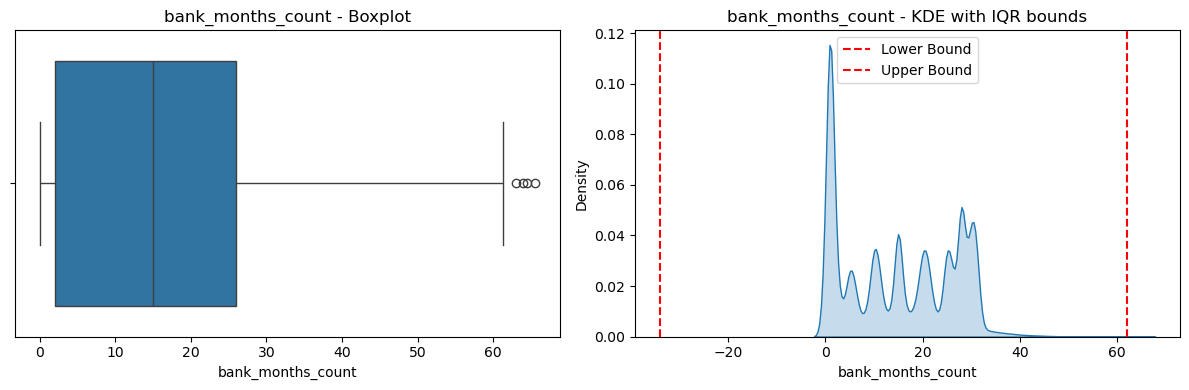

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'bank_months_count' 

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[branch_application_count_8weeks] 이상치 개수: 122726 (17.53%)
count    700000.000000
mean        184.425411
std         459.681711
min           0.000000
25%           1.000000
50%           9.000000
75%          25.000000
max        2359.000000
Name: branch_application_count_8weeks, dtype: float64


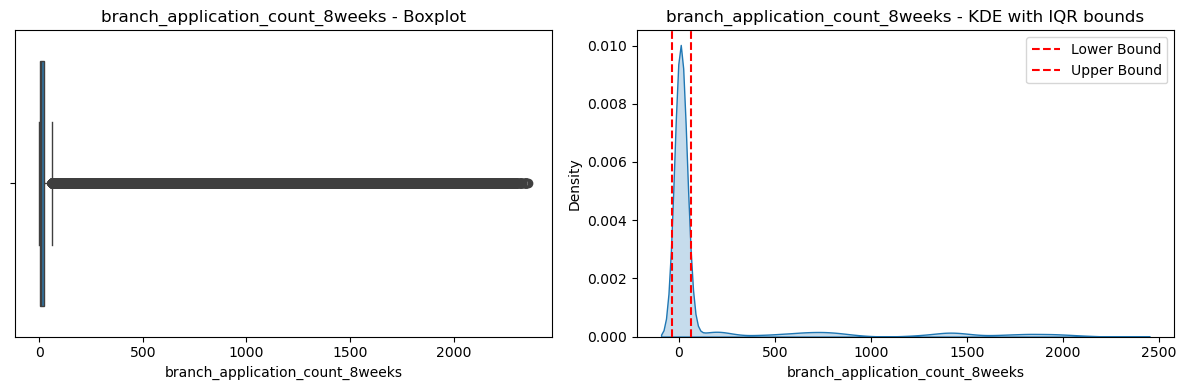

In [38]:
col = 'branch_application_count_8weeks' 

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[credit_risk_score] 이상치 개수: 6105 (0.87%)
count    700000.000000
mean        130.985149
std          69.688134
min        -170.000000
25%          83.000000
50%         122.000000
75%         178.000000
max         389.000000
Name: credit_risk_score, dtype: float64


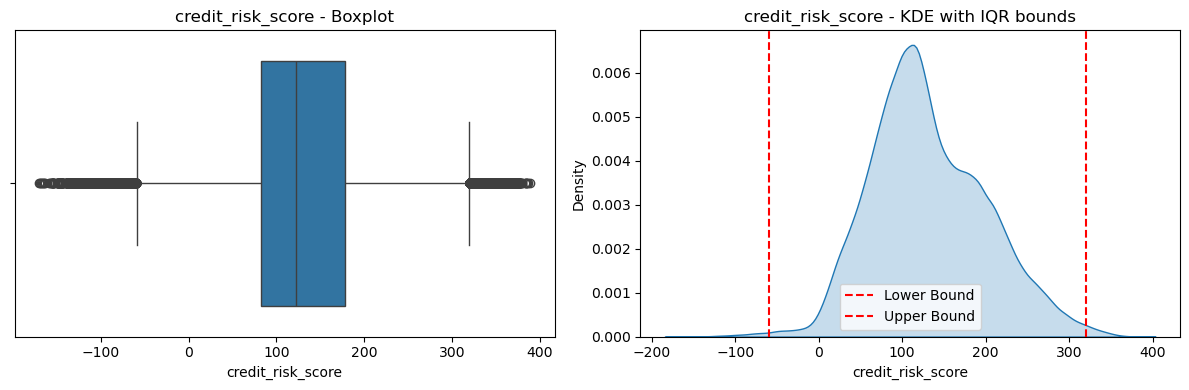

In [40]:
col = 'credit_risk_score'  

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[current_address_months_count] 이상치 개수: 29007 (4.14%)
count    700000.000000
mean         86.918730
std          88.169763
min           0.000000
25%          20.000000
50%          53.000000
75%         130.000000
max         428.000000
Name: current_address_months_count, dtype: float64


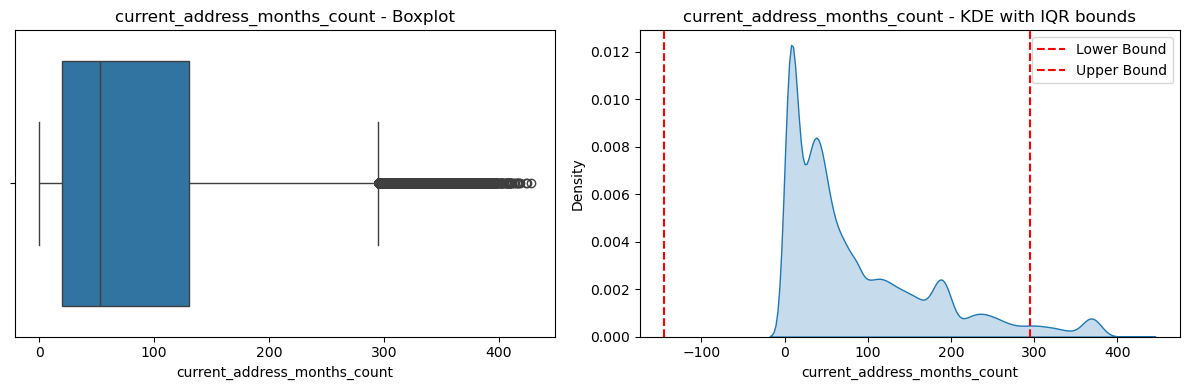

In [42]:
col = 'current_address_months_count'  

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[customer_age] 이상치 개수: 958 (0.14%)
count    700000.000000
mean         33.698871
std          12.023708
min          10.000000
25%          20.000000
50%          30.000000
75%          40.000000
max          90.000000
Name: customer_age, dtype: float64


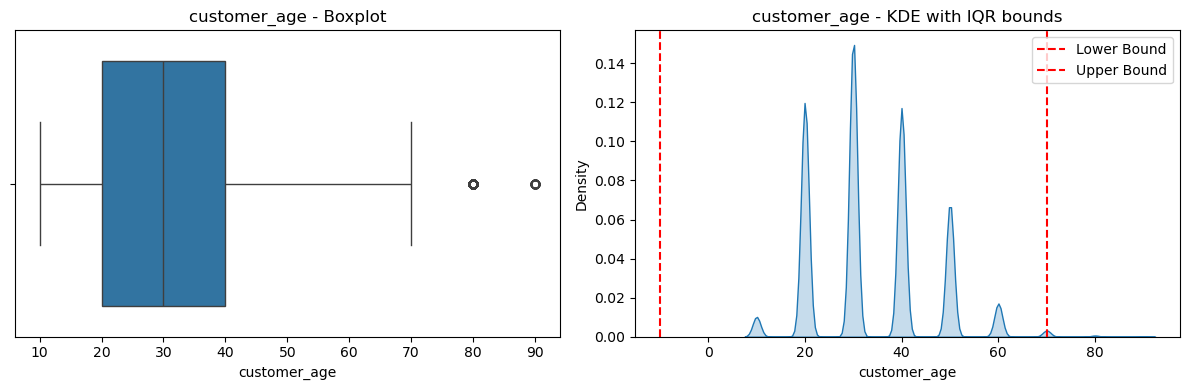

In [44]:
col = 'customer_age'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[date_of_birth_distinct_emails_4w] 이상치 개수: 6772 (0.97%)
count    700000.000000
mean          9.502097
std           5.033417
min           0.000000
25%           6.000000
50%           9.000000
75%          13.000000
max          39.000000
Name: date_of_birth_distinct_emails_4w, dtype: float64


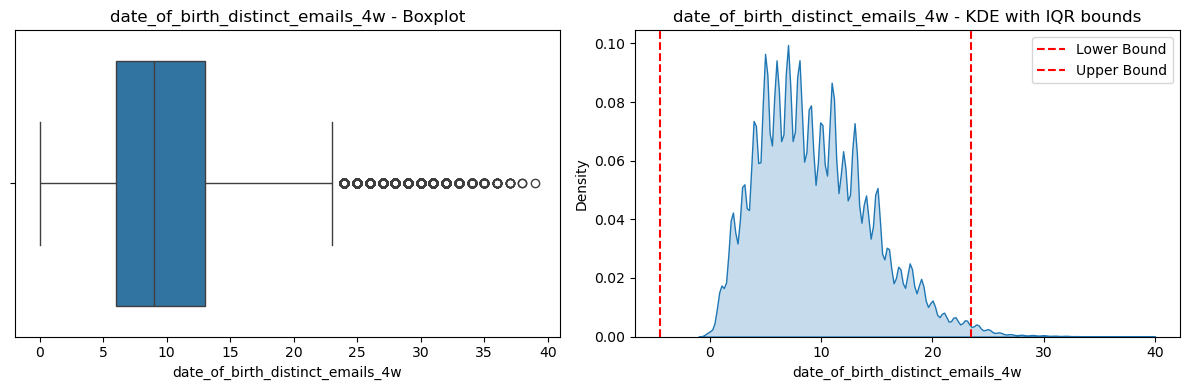

In [48]:
col = 'date_of_birth_distinct_emails_4w' 

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[days_since_request] 이상치 개수: 65619 (9.37%)
count    700000.000000
mean          1.022278
std           5.371060
min           0.000000
25%           0.010000
50%           0.020000
75%           0.030000
max          78.460000
Name: days_since_request, dtype: float64


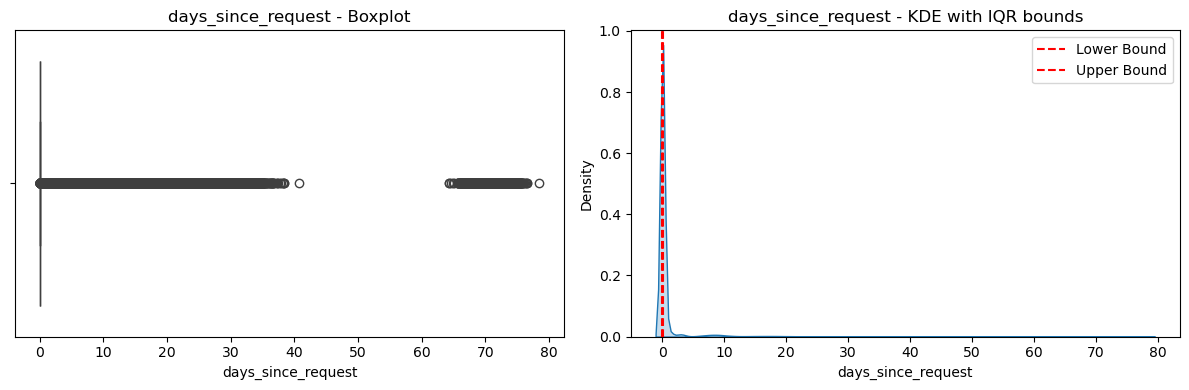

In [52]:
col = 'days_since_request'  

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[device_distinct_emails_8w] 이상치 개수: 22174 (3.17%)
count    700000.000000
mean          1.019146
std           0.176948
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: device_distinct_emails_8w, dtype: float64


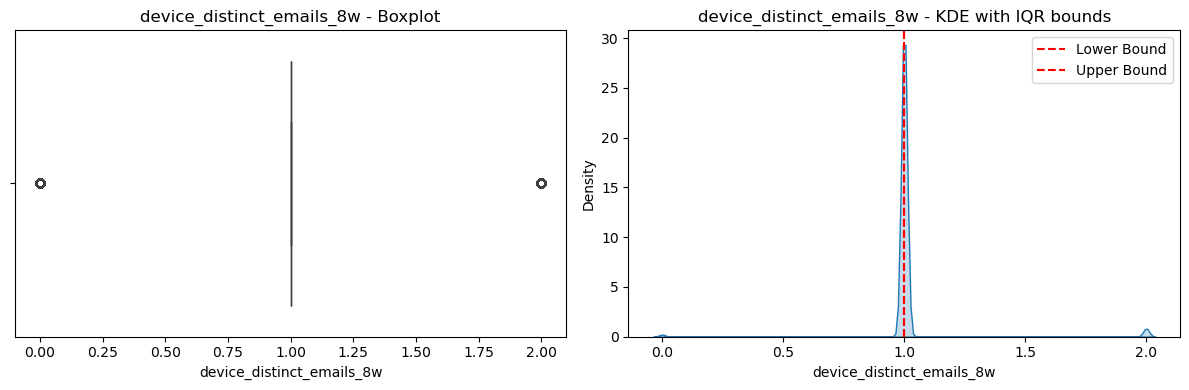

In [54]:
col = 'device_distinct_emails_8w' 

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[device_previously_fraudulent] 이상치 개수: 0 (0.00%)
count    700000.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: device_previously_fraudulent, dtype: float64


/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_82064/2864016988.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=file_1, x=col, fill=True)


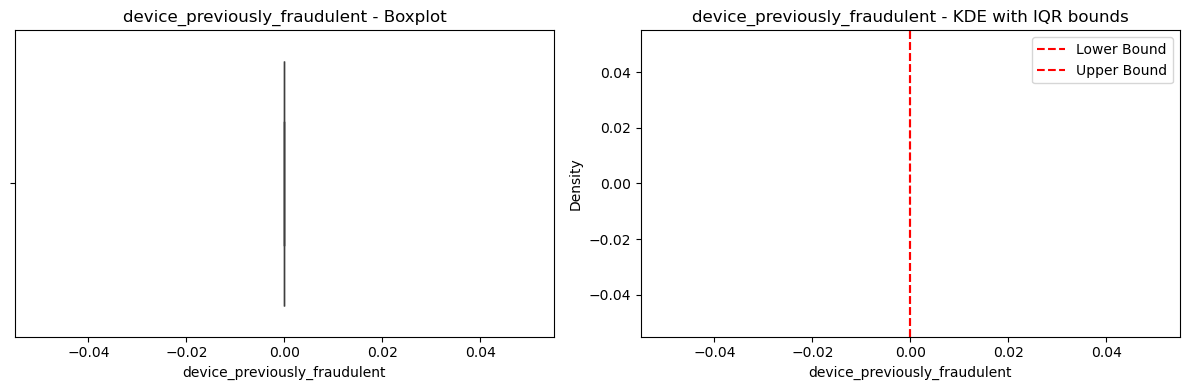

In [58]:
col = 'device_previously_fraudulent'  

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[income] 이상치 개수: 0 (0.00%)
count    700000.000000
mean          0.562526
std           0.290355
min           0.100000
25%           0.300000
50%           0.600000
75%           0.800000
max           0.900000
Name: income, dtype: float64


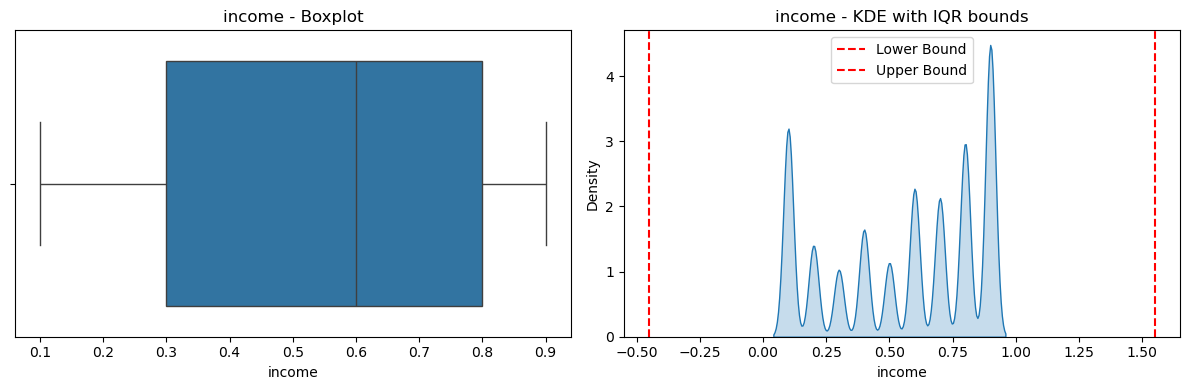

In [60]:
col = 'income'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[month] 이상치 개수: 0 (0.00%)
count    700000.000000
mean          3.288677
std           2.210689
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           7.000000
Name: month, dtype: float64


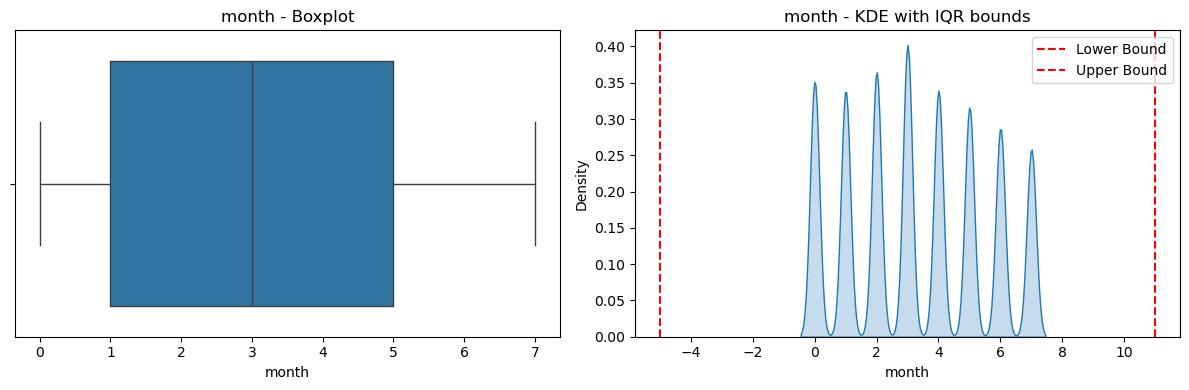

In [62]:
col = 'month'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[name_email_similarity] 이상치 개수: 0 (0.00%)
count    700000.000000
mean          0.493821
std           0.289246
min           0.000001
25%           0.225204
50%           0.492449
75%           0.755689
max           0.999999
Name: name_email_similarity, dtype: float64


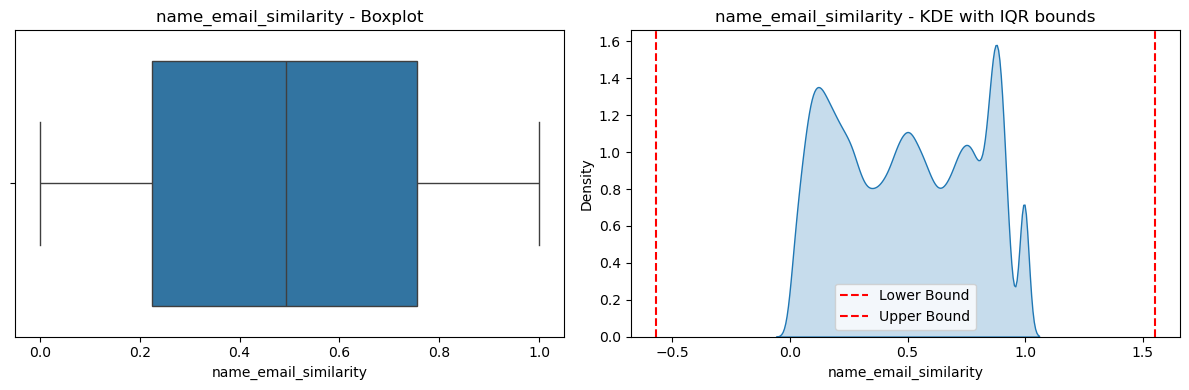

In [64]:
col = 'name_email_similarity'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[requested_credit_limit] 이상치 개수: 169191 (24.17%)
count    700000.000000
mean        515.683129
std         487.416650
min         190.000000
25%         200.000000
50%         200.000000
75%         500.000000
max        2100.000000
Name: requested_credit_limit, dtype: float64


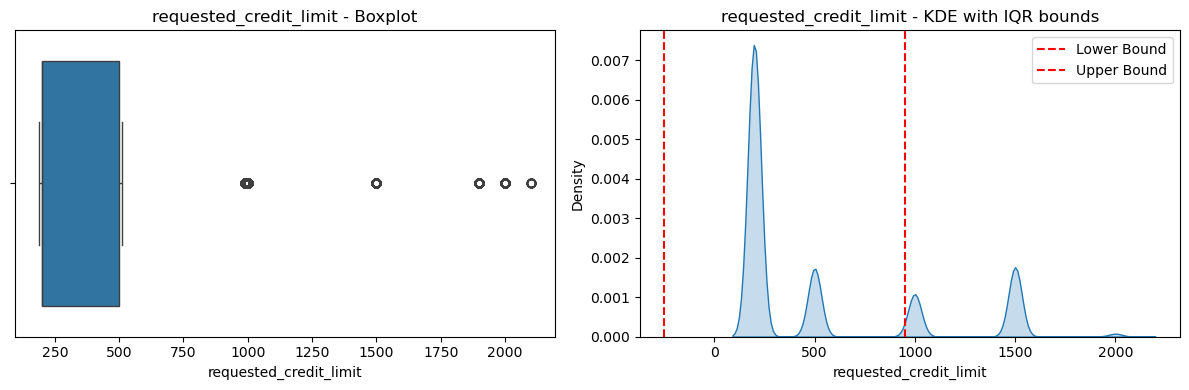

In [66]:
col = 'requested_credit_limit'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[session_length_in_minutes] 이상치 개수: 54325 (7.76%)
count    700000.000000
mean          7.564633
std           8.029315
min           0.000000
25%           3.100000
50%           5.100000
75%           8.900000
max          85.900000
Name: session_length_in_minutes, dtype: float64


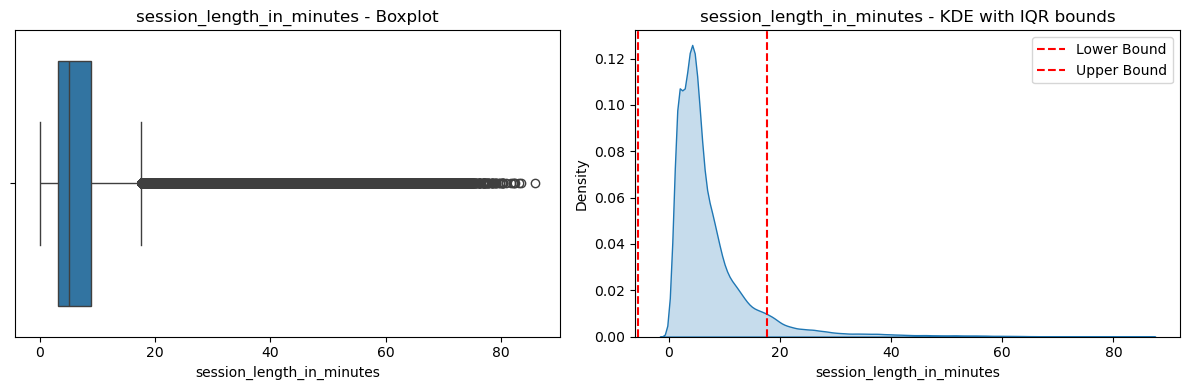

In [68]:
col = 'session_length_in_minutes'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[velocity_24h] 이상치 개수: 2115 (0.30%)
count    700000.000000
mean       4768.535676
std        1478.556133
min        1324.790000
25%        3594.017500
50%        4748.815000
75%        5749.762500
max        9506.900000
Name: velocity_24h, dtype: float64


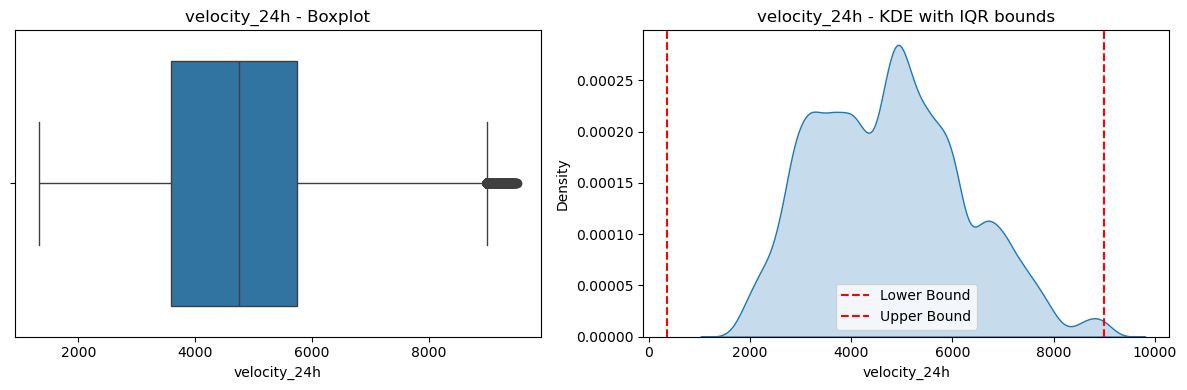

In [70]:
col = 'velocity_24h'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[session_length_in_minutes] 이상치 개수: 54325 (7.76%)
count    700000.000000
mean          7.564633
std           8.029315
min           0.000000
25%           3.100000
50%           5.100000
75%           8.900000
max          85.900000
Name: session_length_in_minutes, dtype: float64


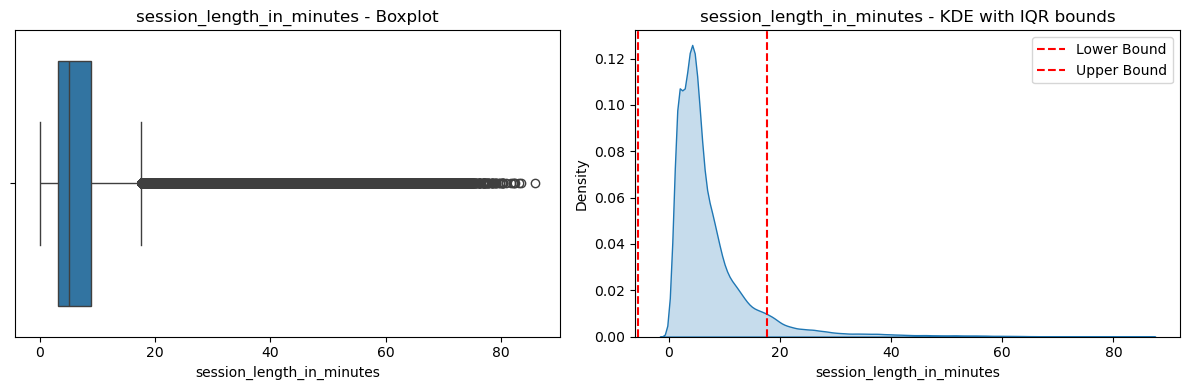

In [72]:
col = 'session_length_in_minutes'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [74]:
# 사기 관련 feature 선택
score_cols = ['requested_credit_limit', 'zip_count_4w', 'credit_risk_score']

# 각 feature를 정규화 후 가중합으로 사기 점수 계산
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
file_2_scaled = scaler.fit_transform(file_2[score_cols])
file_2['fraud_score'] = file_2_scaled @ [0.5, 0.3, 0.2]  # 가중치 조절 가능

In [76]:
fraud_ratio = file_1['fraud'].mean()  # 예: 0.0111
top_n = int(len(file_2) * fraud_ratio)

file_2['fraud'] = 0
file_2.loc[file_2['fraud_score'].nlargest(top_n).index, 'fraud'] = 1

In [78]:
submission_df = file_2[['id', 'fraud']]
submission_df.to_csv("submission.csv", index=False)

In [80]:
import pandas as pd

# 파일 불러오기
submission_df = pd.read_csv("submission.csv")

# fraud 값 분포 확인
fraud_counts = submission_df['fraud'].value_counts()

print("fraud 값 개수:")
print(fraud_counts)

fraud 값 개수:
fraud
0    296670
1      3330
Name: count, dtype: int64
